In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\91962\Downloads\Fraud.csv", low_memory= False)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


#### step : timestep
#### type : type of transaction : CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
#### amount : local currency
#### nameOrig : customer who started transaction
#### oldbalanceOrg : initial balance before transaction
#### newbalanceOrig : balance after transaction
#### oldbalanceDest : initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
#### newbalanceDest : new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
#### isFraud : This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
#### isFlaggedFraud : The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### no null values

In [6]:
df.rename(columns = {'nameOrig' : 'initiator', 
                        'oldbalanceOrg' : 'prev_bal_of_initiator', 
                        'newbalanceOrig' : 'new_bal_of_initiator', 
                        'nameDest' : 'receipent', 
                        'oldbalanceDest' : 'prev_bal_of_receipent',
                        'newbalanceDest' : 'new_bal_of_receipent',
                        }, inplace = True)

In [7]:
df.head()

,step,type,amount,initiator,prev_bal_of_initiator,new_bal_of_initiator,receipent,prev_bal_of_receipent,new_bal_of_receipent,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### there are no missing values
#### lets start see unique classes in object columns and go ahead for EDA

In [8]:
print("unique initiators", df.initiator.nunique(), "\nUnique reciepents",df.receipent.nunique()) 

unique initiators 6353307 
Unique reciepents 2722362


#### insight 1 : 
 > we have very less number of unique receipents compared to initiators, which means there are many common receipents among initiators, <br>can be <b>business owners, vendors or fraudelent receipents</b>

In [9]:
df.describe().map(lambda x: '{:,.0f}'.format(x))

,step,amount,prev_bal_of_initiator,new_bal_of_initiator,prev_bal_of_receipent,new_bal_of_receipent,isFraud,isFlaggedFraud
count,"6,362,620","6,362,620","6,362,620","6,362,620","6,362,620","6,362,620","6,362,620","6,362,620"
mean,243,"179,862","833,883","855,114","1,100,702","1,224,996",0,0
std,142,"603,858","2,888,243","2,924,049","3,399,180","3,674,129",0,0
min,1,0,0,0,0,0,0,0
25%,156,"13,390",0,0,0,0,0,0
50%,239,"74,872","14,208",0,"132,706","214,661",0,0
75%,335,"208,721","107,315","144,258","943,037","1,111,909",0,0
max,743,"92,445,517","59,585,040","49,585,040","356,015,889","356,179,279",1,1


#### if we consider each step as hour, 743/24 = 30.9~31 days or data of a month

In [10]:
df[df.amount == 0].shape

(16, 11)

In [8]:
indexes = df[df.amount == 0].index
df.drop(indexes, axis = 0, inplace = True)

In [9]:
df.drop_duplicates(inplace = True)

# EDA
## univariate analysis

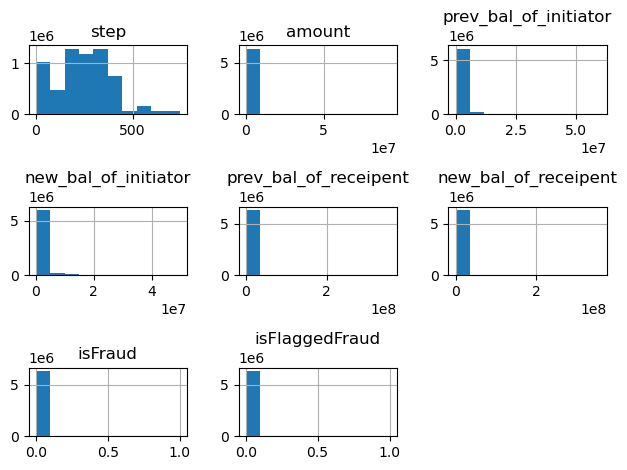

In [13]:
df.hist()
plt.tight_layout()
plt.show()

### most values are close to 0 or very less than 10^7, try seeing distribution through box plots

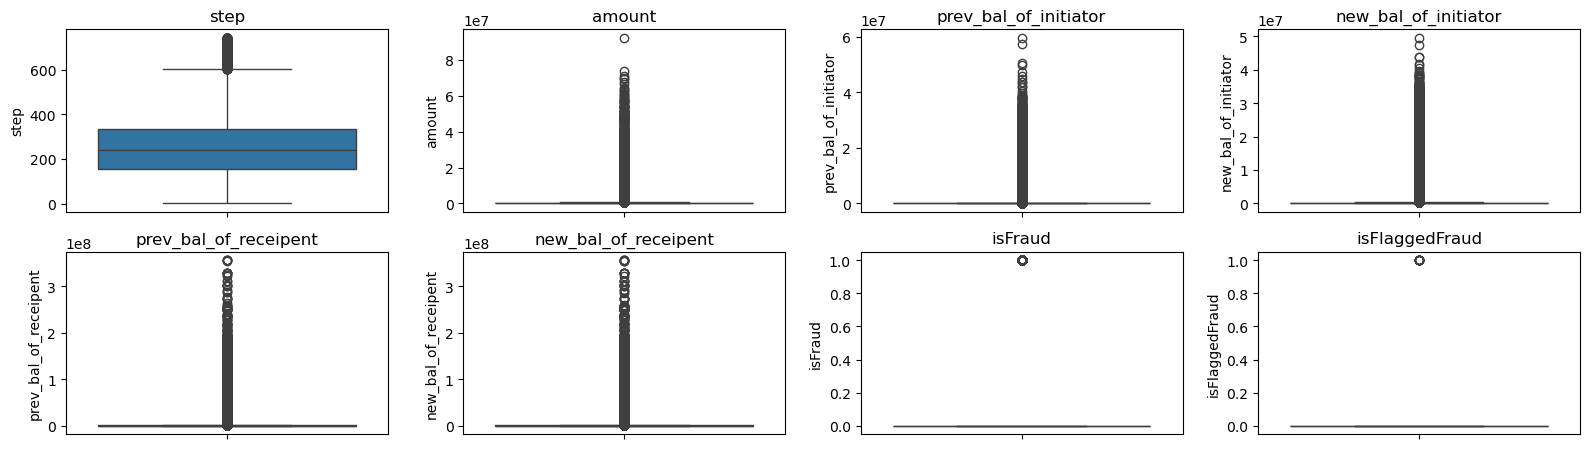

In [14]:
num = df.select_dtypes(include = ["float64", "int64"])
num = num.columns

plt.figure(figsize = (16, 9))
for i, j in enumerate(num):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df[j])
    plt.title(j)

plt.tight_layout()
plt.show()

### insight 2:
> most outliers are high values and most values are very less compared to outliers, we should find a way to handle and flag this outliers.

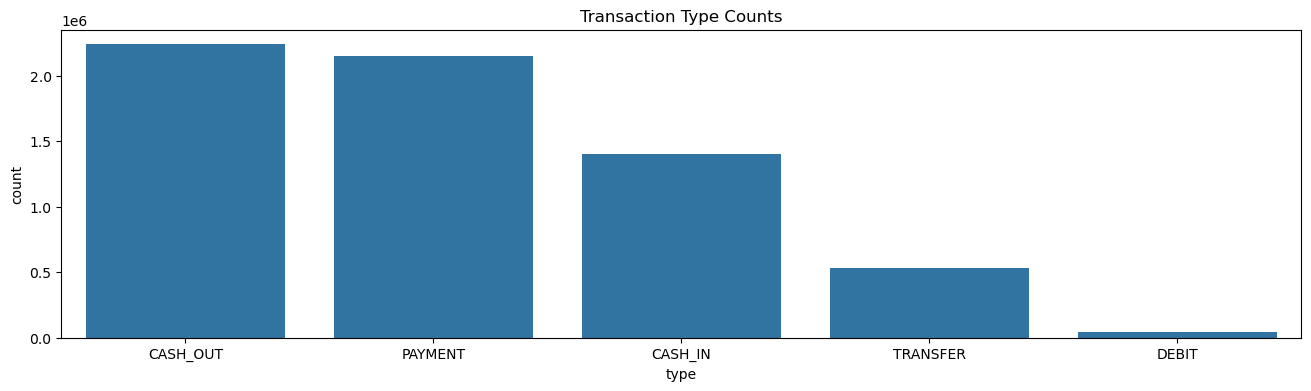

In [15]:
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']
plt.figure(figsize = (16, 4))
sns.barplot(x='type', y='count', data=type_counts)
plt.title("Transaction Type Counts")
plt.show()

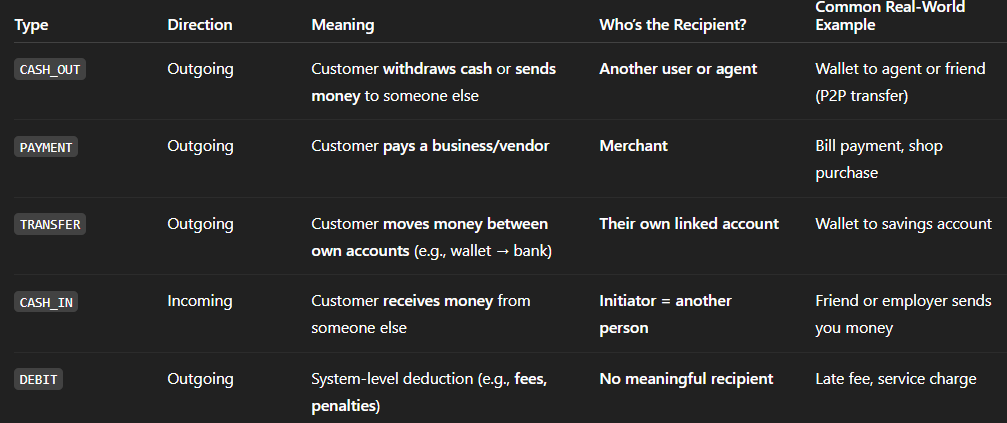

### insight 3:
> 1. most transactions are cash-out and payment ones
> 2. debit is minimum used transaction since it is system level deduction or service charge so its obvious.

## bi-variate analysis

#### its mentioned that customer that starts with M doesnt have receipents acc tracking and likely all 0. 
#### still the diff between both balance should be equal to transaction amount

In [9]:
df['diff_initiator'] = abs(df['prev_bal_of_initiator'] - df['new_bal_of_initiator'])
df['diff_receipent'] = abs(df['new_bal_of_receipent'] - df['prev_bal_of_receipent'])

In [10]:
# get boolean rep
df['initiator_matches'] = df['diff_initiator'] == df['amount']
df['receipent_matches'] = df['diff_receipent'] == df['amount']

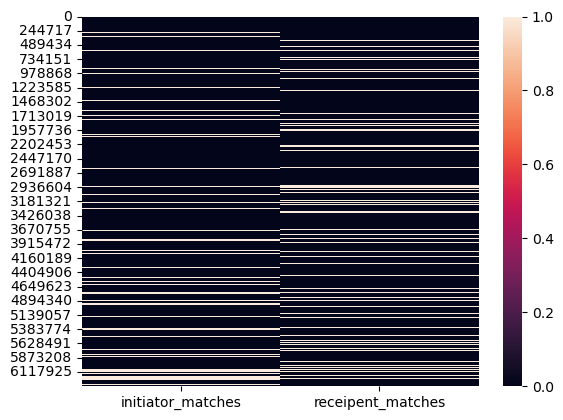

In [11]:
sns.heatmap(df[['initiator_matches', 'receipent_matches']])
plt.show()

### insight 4
> - very less amount of difference match with transcation amount <br>
> - probably because we dont have True information or information is missing <br>
> - this chart rise questions about quality of data, since this logic should hold true here and whole graph should be white. But it isnt. <br>
> - I will drop these 3 columns [<b>new_bal_of_initiator,	prev_bal_of_receipent,	new_bal_of_receipent</b>] from analysis or machine learning model since they dont add predictive value to data
> - Since fraudelent transactions happens in accounts with moderate to high balance, previous balance of initiator matteres

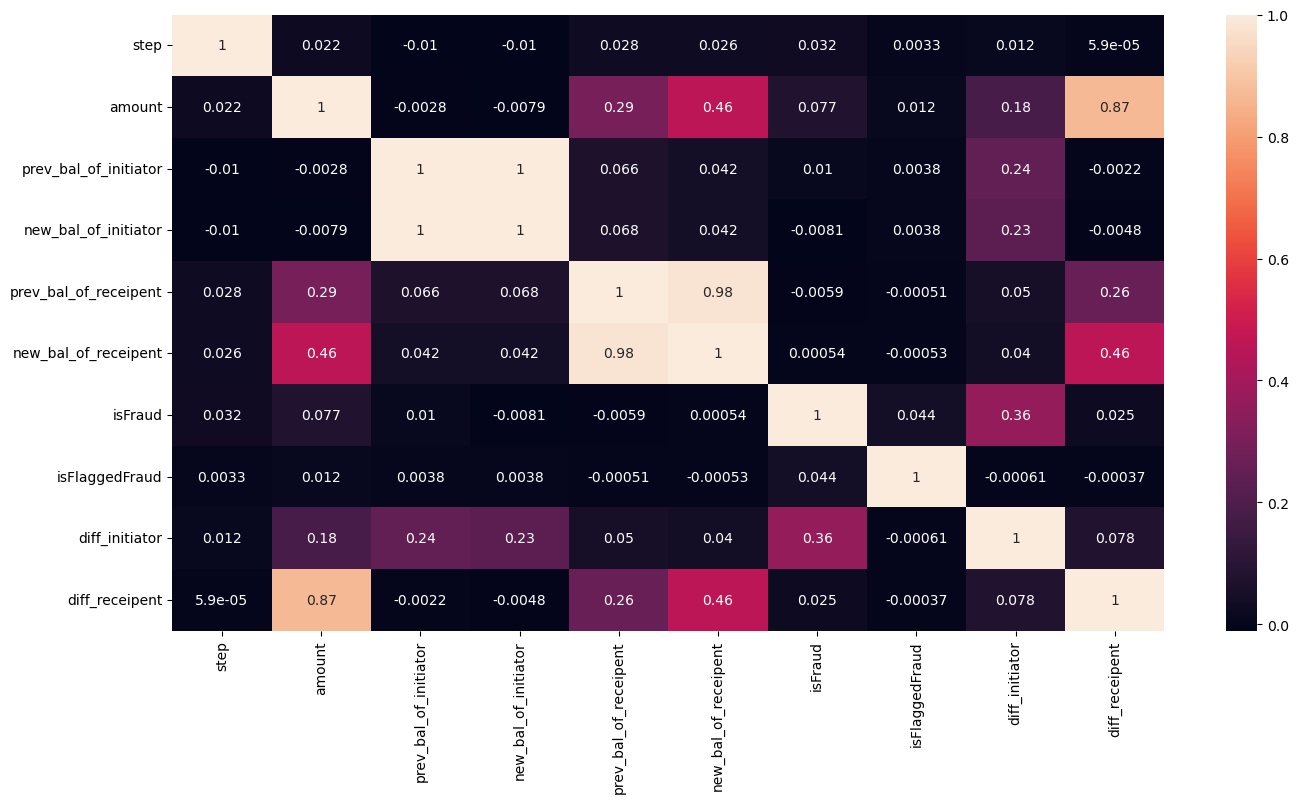

In [12]:
num = df.select_dtypes(include = ['int64', 'float64'])
plt.figure(figsize = (16,8))
sns.heatmap(num.corr(), annot = True)
plt.show()

- prev bal and new bal of iniator highly corelated, one of them should be dropeed
- prev bal and new bal of receipent highly corelated, one of them should be dropeed
- diff initiator have high corelation of .36 with target, but diff receipent have high corelation with amount so diff receipetn should be dropped.

In [13]:
df.drop(['new_bal_of_initiator', 'prev_bal_of_receipent', 'new_bal_of_receipent', 'diff_receipent', 'initiator_matches', 'receipent_matches'], axis = 1, inplace = True)

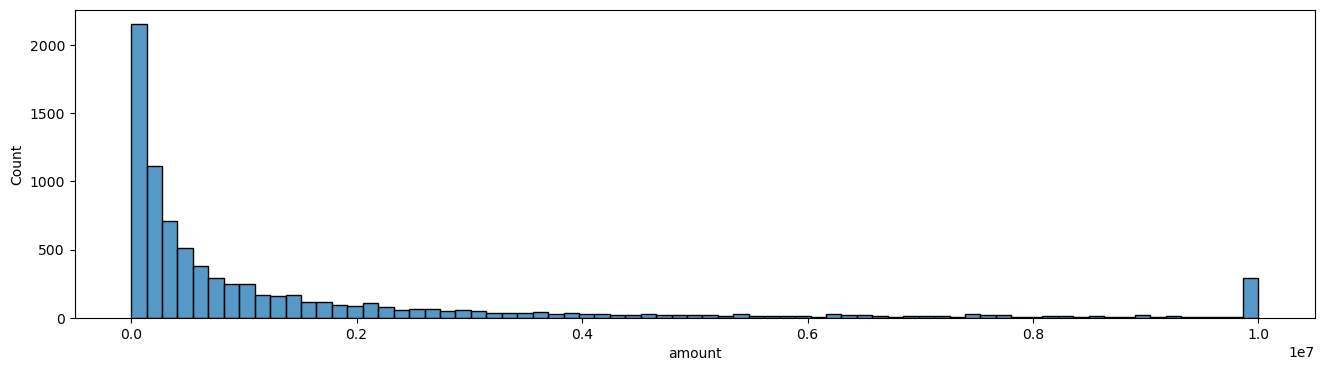

In [21]:
plt.figure(figsize = (16, 4))
sns.histplot(df[df.isFraud==1]['amount'])
plt.show()

### insight 5:
> 1. Fraudsters are more commonly targeting small to mid-sized transactions
> 2. They're avoiding detection by staying under red-flag thresholds.

## multi-variate analysis

In [22]:
aux = df.groupby(['step', 'type']).agg({'amount' : 'sum'})

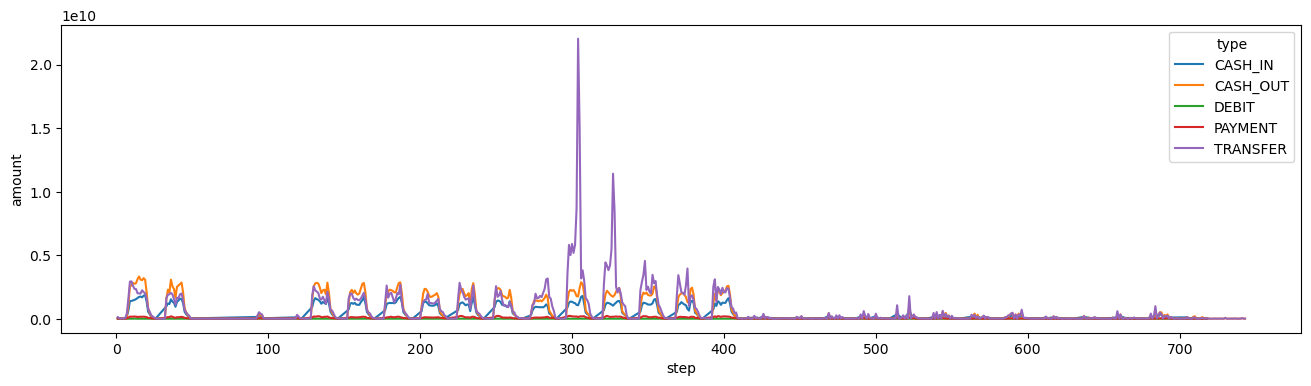

In [23]:
plt.figure(figsize = (16, 4))
sns.lineplot(data = aux, x = 'step', y = 'amount', hue = "type")
plt.show()

### insight 6:
> - for some time we see periodic and approximately close amount of transaction in all transaction types, there are more spikes in transfer type,but what might be the reason for this periodic data ? since periodic transaction type indicate some form of normality <br>
> - since this is aggregated data for all transaction types, we can hypothesize that abnormality in transaction during certain periods indicates fraud transactions

### lets check frequency of fraudulent transactions

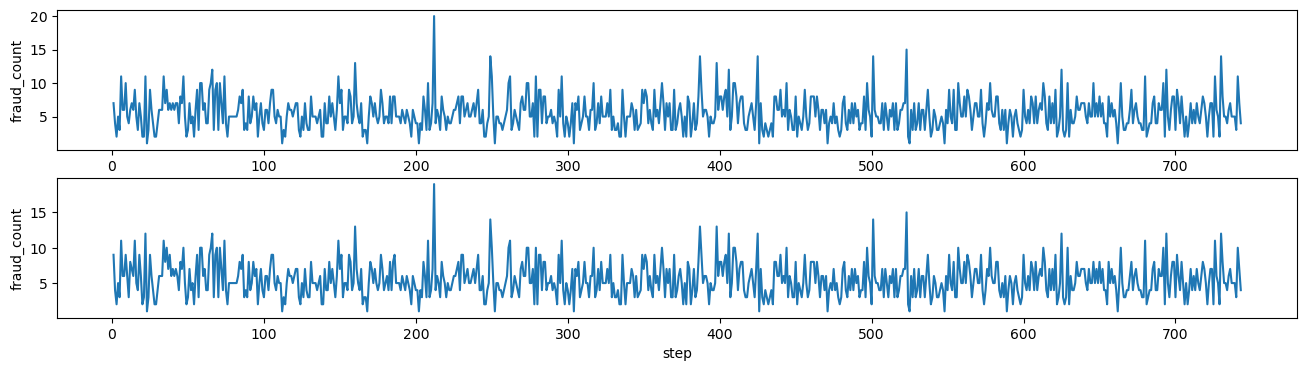

In [24]:
plt.figure(figsize = (16, 4))
aux1 = df[(df.isFraud == 1) & (df.type == 'TRANSFER')].groupby('step')[['amount']].count().rename(columns={'amount': 'fraud_count'})
aux2 = df[(df.isFraud == 1) & (df.type == 'CASH_OUT')].groupby('step')[['amount']].count().rename(columns={'amount': 'fraud_count'})

plt.subplot(2, 1, 1)
sns.lineplot(aux1, x = 'step', y = 'fraud_count')

plt.subplot(2, 1, 2)
sns.lineplot(aux2, x = 'step', y = 'fraud_count')
plt.show()

### insight 7:
> fraud count at each hour stays within [1, 20] range<br>
> both charts look identical, lets see the difference betweeen fraudlent transaction at each step

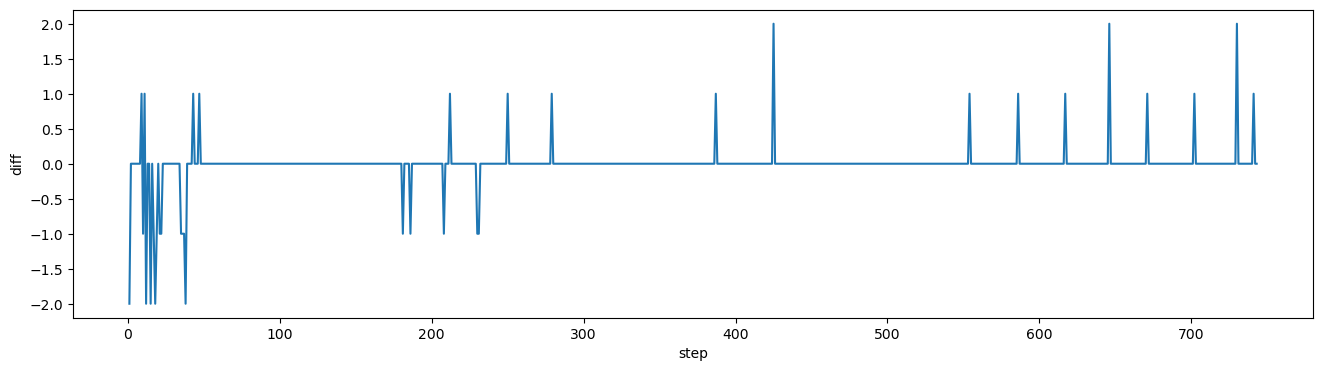

In [25]:
plt.figure(figsize = (16, 4))
aux1['diff'] = aux1['fraud_count'] - aux2['fraud_count']
sns.lineplot(aux1, x = 'step', y = 'diff')
plt.show()

### insight 8:
> this is unusual, the difference between fraudulent transaction of both type have difference of range [-2, 2].

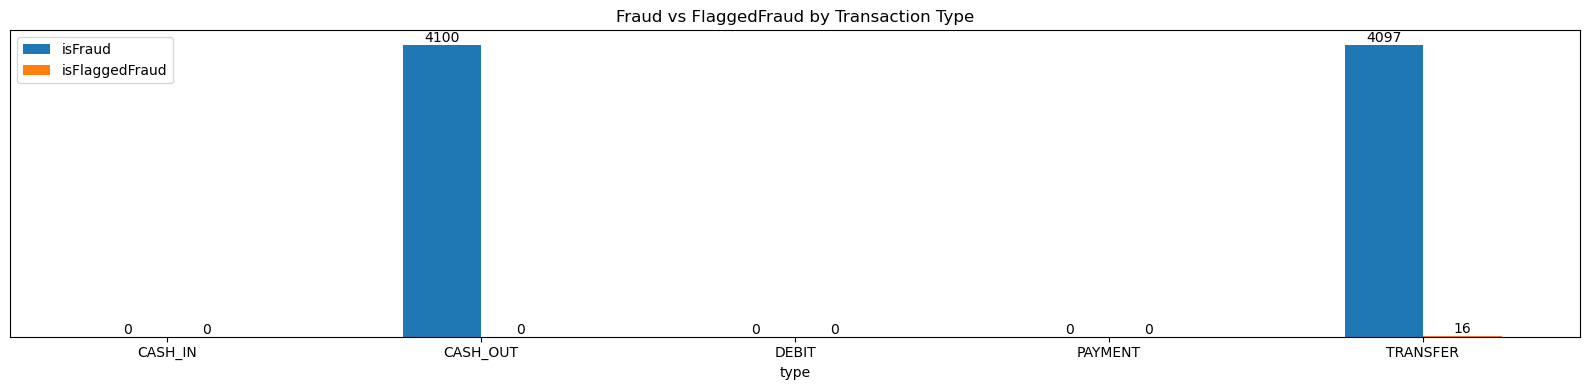

In [49]:
aux = df.groupby('type').agg({'isFraud' : 'sum', 'isFlaggedFraud' : 'sum'})
ax = aux.plot(kind='bar', figsize=(16, 4))
plt.title("Fraud vs FlaggedFraud by Transaction Type")
plt.xticks(rotation=0)
ax.yaxis.set_visible(False)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

### insight 9:
> - All frauds are either cash_out or transfer types.<br>
> - business models flagging system is not benefecial since it only flags transactions above 200,000 as abnormal, which not might be the case. <br>
> - frauds can also happen in small many transactions<br>
> - Also most of the fraud transactions are not flagged.

### receipent vs fraud

In [11]:
aux = df[['receipent']][df.isFraud == 1]
print("total fraudulent receipents :", aux.shape[0])
i, j = 0, 0
for x in aux['receipent']:
    if 'C' in x:
        i +=1
    else:
        j +=1
print("Merchant accounts in fraudlent transactions are {} and non merchant accounts are {}".format(j, i))

total fraudulent receipents : 8197
Merchant accounts in fraudlent transactions are 0 and non merchant accounts are 8197


### insight 10:
> 1. All fraudulent accounts are non merchant accounts

### action :
> create a binary feature showing whether the account is merchant or non merchat.

In [14]:
df.head()

,step,type,amount,initiator,prev_bal_of_initiator,receipent,isFraud,isFlaggedFraud,diff_initiator
0,1,PAYMENT,9839.64,C1231006815,170136.0,M1979787155,0,0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,M2044282225,0,0,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,C553264065,1,0,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,C38997010,1,0,181.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,M1230701703,0,0,11668.14


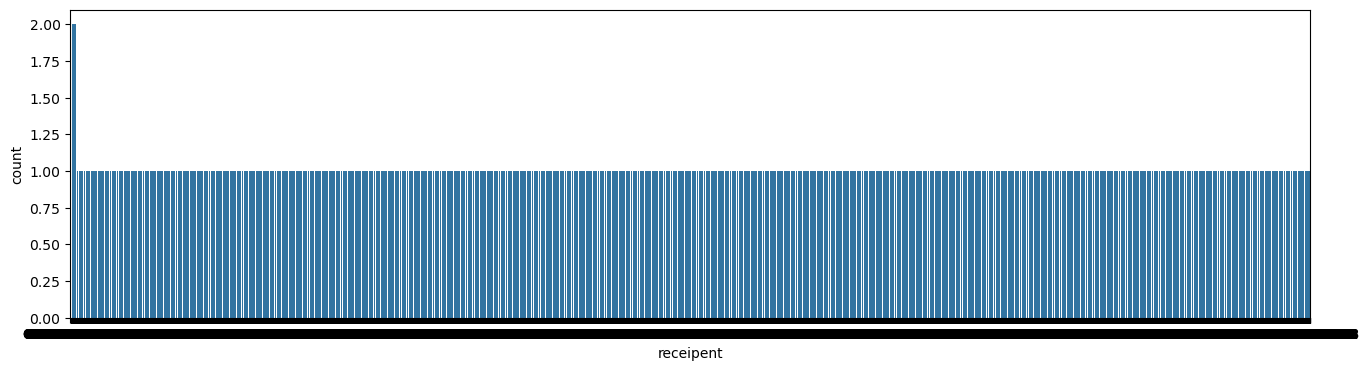

In [32]:
plt.figure(figsize = (16, 4))
sns.barplot(df[df.isFraud == 1].receipent.value_counts())
plt.show()

### insight 12:
> the fraudelent transaction isnt dependend on account number, they use new accounts every time to fraud payment, so its not possible to flag receipents account
### Action :
> initiator or receipent unique id doesnt matter in ML model. <br>so both initiator and receipent will be dropped from data that is to be fed to ML model.

In [15]:
df.drop(['initiator', 'receipent'], axis = 1, inplace = True)

In [16]:
df.head()

,step,type,amount,prev_bal_of_initiator,isFraud,isFlaggedFraud,diff_initiator
0,1,PAYMENT,9839.64,170136.0,0,0,9839.64
1,1,PAYMENT,1864.28,21249.0,0,0,1864.28
2,1,TRANSFER,181.00,181.0,1,0,181.00
3,1,CASH_OUT,181.00,181.0,1,0,181.00
4,1,PAYMENT,11668.14,41554.0,0,0,11668.14


### insight 13:
> step is also a time step so it only matters for continuity/sequences
> since sequence sometimes show patterns, i should keep steps

# Preparation for ML

1. amount is right skewed data so will apply log transform.
3. type is categorical so label encoder will be applied.

In [17]:
dfml = df.copy()

In [18]:
dfml = pd.get_dummies(dfml, columns=['type'])

In [19]:
dfml.head()

,step,amount,prev_bal_of_initiator,isFraud,isFlaggedFraud,diff_initiator,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,0,0,9839.64,False,False,False,True,False
1,1,1864.28,21249.0,0,0,1864.28,False,False,False,True,False
2,1,181.00,181.0,1,0,181.00,False,False,False,False,True
3,1,181.00,181.0,1,0,181.00,False,True,False,False,False
4,1,11668.14,41554.0,0,0,11668.14,False,False,False,True,False


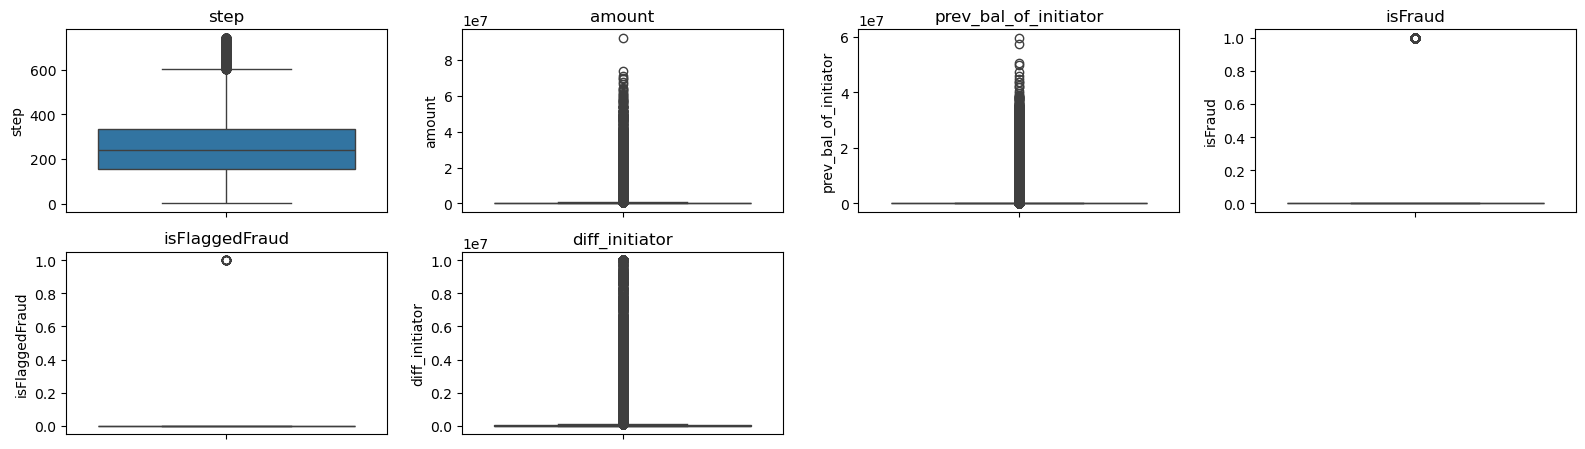

In [22]:
num = df.select_dtypes(include = ["float64", "int64"])
num = num.columns

plt.figure(figsize = (16, 9))
for i, j in enumerate(num):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df[j])
    plt.title(j)

plt.tight_layout()
plt.show()

In [26]:
dfml['log_amount'] = np.log1p(dfml['amount'])
dfml['log_prev_bal_initiator'] = np.log1p(dfml['prev_bal_of_initiator'])
dfml['log_diff_initiator'] = np.log1p(dfml['diff_initiator'])

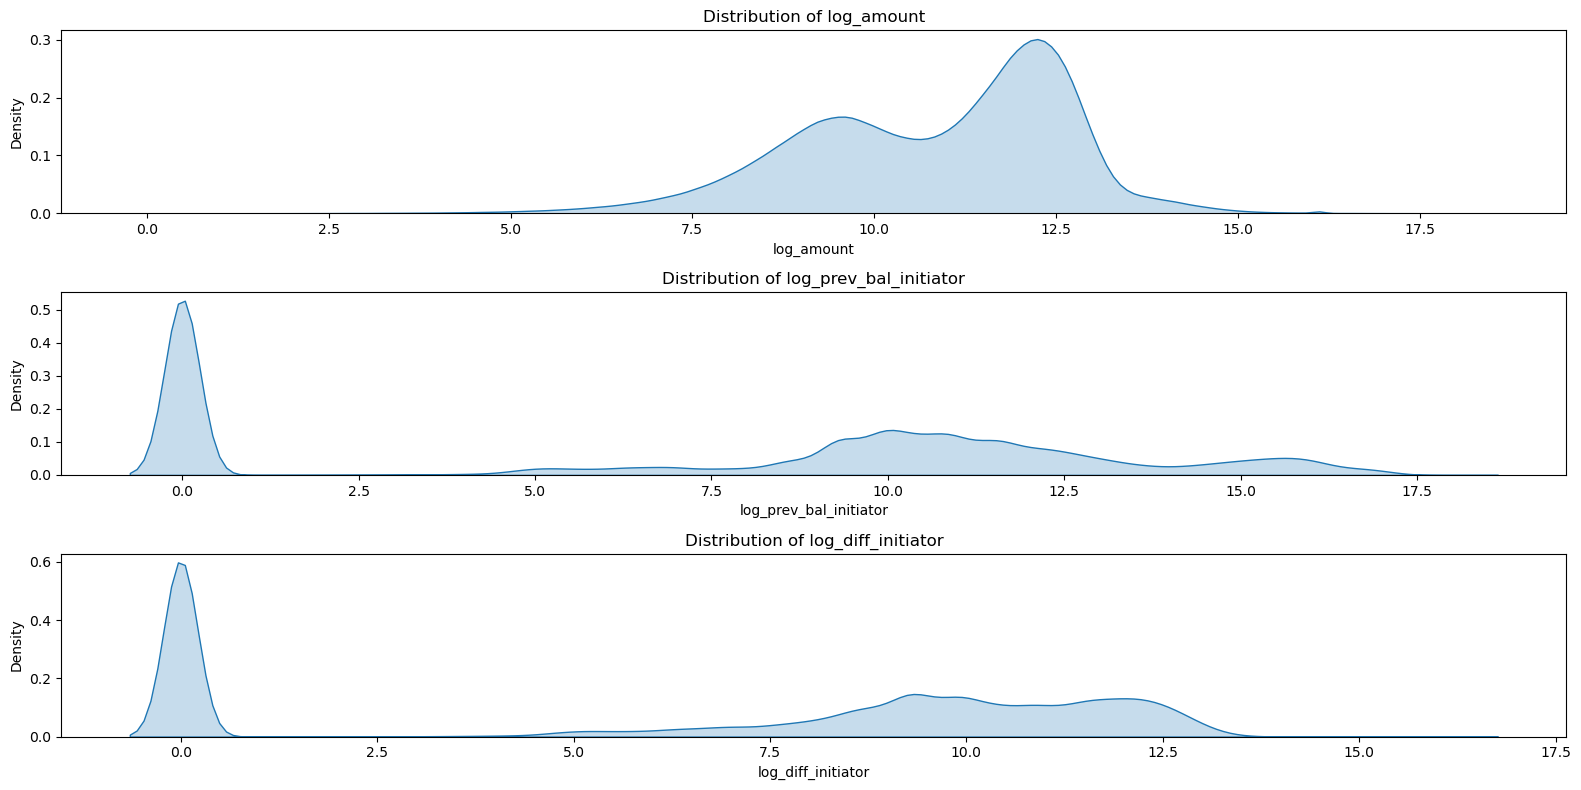

In [28]:
plt.figure(figsize=(16, 8))  # Optional: set figure size
k = ['log_amount', 'log_prev_bal_initiator', 'log_diff_initiator']
for i, x in enumerate(k):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(dfml[x], fill=True)
    plt.title(f'Distribution of {x}')
    plt.tight_layout()

plt.show()

In [30]:
print("Skew before:", dfml['amount'].skew())
print("Skew after :", dfml['log_amount'].skew())
print("Skew before:", dfml['prev_bal_of_initiator'].skew())
print("Skew after :", dfml['log_prev_bal_initiator'].skew())
print("Skew before:", dfml['diff_initiator'].skew())
print("Skew after :", dfml['log_diff_initiator'].skew())

Skew before: 30.99394948249038
Skew after : -0.5550183204227738
Skew before: 5.249136420603121
Skew after : -0.25972282464865
Skew before: 30.128067437915032
Skew after : -0.43321288259997404


In [31]:
from scipy.stats import zscore
z_scores_df = dfml[k].apply(zscore)
dfml_cleaned = dfml[(np.abs(z_scores_df) < 3).all(axis=1)]

In [36]:
dfml_cleaned.head()

,step,amount,prev_bal_of_initiator,isFraud,isFlaggedFraud,diff_initiator,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,log_amount,log_prev_bal_initiator,log_diff_initiator
0,1,9839.64,170136.0,0,0,9839.64,False,False,False,True,False,9.194276,12.044359,9.194276
1,1,1864.28,21249.0,0,0,1864.28,False,False,False,True,False,7.531166,9.964112,7.531166
4,1,11668.14,41554.0,0,0,11668.14,False,False,False,True,False,9.364703,10.634773,9.364703
5,1,7817.71,53860.0,0,0,7817.71,False,False,False,True,False,8.964275,10.894162,8.964275
6,1,7107.77,183195.0,0,0,7107.77,False,False,False,True,False,8.869085,12.118312,8.869085


## ML

In [42]:
ml = dfml_cleaned.drop(['step', 'amount', 'prev_bal_of_initiator', 'isFlaggedFraud', 'diff_initiator'], axis = 1)

In [43]:
ml.to_csv("ml.csv", index = False)

In [44]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [45]:
dfml = pd.read_csv(r"C:\Users\91962\Accredian Assignment\ml.csv", low_memory = False)

In [46]:
current_model = df['isFlaggedFraud']

In [47]:
dfml.head()

,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,log_amount,log_prev_bal_initiator,log_diff_initiator
0,0,False,False,False,True,False,9.194276,12.044359,9.194276
1,0,False,False,False,True,False,7.531166,9.964112,7.531166
2,0,False,False,False,True,False,9.364703,10.634773,9.364703
3,0,False,False,False,True,False,8.964275,10.894162,8.964275
4,0,False,False,False,True,False,8.869085,12.118312,8.869085


In [48]:
y = dfml['isFraud']
X = dfml.drop(['isFraud'], axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, shuffle=True)

In [50]:
print("train X shape :", X_train.shape, "\ntest X shape", X_test.shape, "\ntrain y shape", y_train.shape, "\ntest y shape", y_test.shape)

train X shape : (4430668, 8) 
test X shape (1898859, 8) 
train y shape (4430668,) 
test y shape (1898859,)


In [51]:
y.value_counts()

isFraud
0    6321350
1       8177
Name: count, dtype: int64

In [52]:
models = {
    # class weight balanced is to counter class imbalance
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=50, class_weight='balanced', n_jobs=-1),
    'Linear SVM': LinearSVC(class_weight='balanced', max_iter=1000),
    'SGD (Hinge)': SGDClassifier(loss='hinge', class_weight='balanced', max_iter=1000),
    'XGBoost': XGBClassifier(scale_pos_weight=775, n_estimators=100, tree_method='hist'),
    'LightGBM': LGBMClassifier(class_weight='balanced', n_estimators=100)
}

In [53]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ----------------------------------------------------------------------------------------------------------")
    print(classification_report(y_test, y_pred, zero_division=0))

--- Logistic Regression ----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1896406
           1       0.01      0.99      0.03      2453

    accuracy                           0.91   1898859
   macro avg       0.51      0.95      0.49   1898859
weighted avg       1.00      0.91      0.95   1898859

--- Decision Tree ----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1896406
           1       0.83      0.84      0.84      2453

    accuracy                           1.00   1898859
   macro avg       0.92      0.92      0.92   1898859
weighted avg       1.00      1.00      1.00   1898859

--- Random Forest ------------------------------------------------------------------------

### LightGBM and XGBoost have high precision and recall for 0 and high recall but low precision for flagging positive frauds.

### precision and recall are very less in all models, probably due to class imbalance, I will use SMOTE to increase minority sampling and thus ML models will be able to catch some patterns in data.

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=False)
print("train X shape :", X_train.shape, "\ntest X shape", X_test.shape, "\ntrain y shape", y_train.shape, "\ntest y shape", y_test.shape)

train X shape : (8849890, 8) 
test X shape (3792810, 8) 
train y shape (8849890,) 
test y shape (3792810,)


In [56]:
y_train.value_counts()

isFraud
0    6321350
1    2528540
Name: count, dtype: int64

In [57]:
y_test.value_counts()

isFraud
1    3792810
Name: count, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True)
print("train X shape :", X_train.shape, "\ntest X shape", X_test.shape, "\ntrain y shape", y_train.shape, "\ntest y shape", y_test.shape)

train X shape : (8849890, 8) 
test X shape (3792810, 8) 
train y shape (8849890,) 
test y shape (3792810,)


In [60]:
y_train.value_counts()

isFraud
1    4425165
0    4424725
Name: count, dtype: int64

In [61]:
y_test.value_counts()

isFraud
0    1896625
1    1896185
Name: count, dtype: int64

In [62]:
lr = LogisticRegression(max_iter=500)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=20, n_jobs=-1)
svc = LinearSVC(max_iter=500)
sgd = SGDClassifier(loss='hinge', max_iter=500)
xgb = XGBClassifier(n_estimators=20, tree_method='gpu_hist')
lgb = LGBMClassifier(class_weight='balanced', n_estimators=20)

In [63]:
def fitpredict(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {model} ---")
    print(classification_report(y_test, y_pred, zero_division=0))

In [64]:
fitpredict(lr)

--- LogisticRegression(max_iter=500) ---
              precision    recall  f1-score   support

           0       0.99      0.91      0.95   1896625
           1       0.92      0.99      0.95   1896185

    accuracy                           0.95   3792810
   macro avg       0.95      0.95      0.95   3792810
weighted avg       0.95      0.95      0.95   3792810



In [65]:
fitpredict(dtc)

--- DecisionTreeClassifier() ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1896625
           1       1.00      1.00      1.00   1896185

    accuracy                           1.00   3792810
   macro avg       1.00      1.00      1.00   3792810
weighted avg       1.00      1.00      1.00   3792810



In [66]:
fitpredict(rfc)

--- RandomForestClassifier(n_estimators=20, n_jobs=-1) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1896625
           1       1.00      1.00      1.00   1896185

    accuracy                           1.00   3792810
   macro avg       1.00      1.00      1.00   3792810
weighted avg       1.00      1.00      1.00   3792810



In [67]:
fitpredict(svc)

--- LinearSVC(max_iter=500) ---
              precision    recall  f1-score   support

           0       0.99      0.88      0.93   1896625
           1       0.89      0.99      0.94   1896185

    accuracy                           0.94   3792810
   macro avg       0.94      0.94      0.94   3792810
weighted avg       0.94      0.94      0.94   3792810



In [68]:
fitpredict(sgd)

--- SGDClassifier(max_iter=500) ---
              precision    recall  f1-score   support

           0       0.99      0.93      0.96   1896625
           1       0.93      0.99      0.96   1896185

    accuracy                           0.96   3792810
   macro avg       0.96      0.96      0.96   3792810
weighted avg       0.96      0.96      0.96   3792810



In [69]:
fitpredict(xgb)

C:\Users\91962\anaconda3\envs\general\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:17:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\91962\anaconda3\envs\general\Lib\site-packages\xgboost\core.py:2676: UserWarning: [20:18:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
C:\Users\91962\anaconda3\envs\general\Lib\site-packages\xgboost\core.py:729: UserWarning: [20:18:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back 

--- XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=None, num_parallel_tree=None, ...) ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1896625
           1       0.98      1.00      0.99   1896185

    accuracy                           0.99   3792810
   macro avg   

In [70]:
fitpredict(lgb)

[LightGBM] [Info] Number of positive: 4425165, number of negative: 4424725
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.200756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 8849890, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
--- LGBMClassifier(class_weight='balanced', n_estimators=20) ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1896625
           1       0.98      1.00      0.99   1896185

    accuracy                           0.99   3792810
   macro avg       0.99      0.99      0.99   3792810
weighted avg       0.99      0.99      0.99   3792810



### the best perofrming model is lightgbm and xgboost, which accounts 0.99 f1 score in both

### candidate expectations answers

In [72]:
res = {
    "Model": [
        "LogisticRegression",
        "DecisionTree",
        "RandomForest",
        "LinearSVC",
        "SGDClassifier",
        "XGBoost",
        "LightGBM"
    ],
    "Precision_0": [0.99, 1.00, 1.00, 0.99, 0.99, 1.00, 1.00],
    "Recall_0": [0.91, 1.00, 1.00, 0.88, 0.93, 0.98, 0.98],
    "F1_0": [0.95, 1.00, 1.00, 0.93, 0.96, 0.99, 0.99],
    "Precision_1": [0.92, 1.00, 1.00, 0.89, 0.93, 0.98, 0.98],
    "Recall_1": [0.99, 1.00, 1.00, 0.99, 0.99, 1.00, 1.00],
    "F1_1": [0.95, 1.00, 1.00, 0.94, 0.96, 0.99, 0.99]
}
res = pd.DataFrame(res)

,Model,Precision_0,Recall_0,F1_0,Precision_1,Recall_1,F1_1
0,LogisticRegression,0.99,0.91,0.95,0.92,0.99,0.95
1,DecisionTree,1.00,1.00,1.00,1.00,1.00,1.00
2,RandomForest,1.00,1.00,1.00,1.00,1.00,1.00
3,LinearSVC,0.99,0.88,0.93,0.89,0.99,0.94
4,SGDClassifier,0.99,0.93,0.96,0.93,0.99,0.96
5,XGBoost,1.00,0.98,0.99,0.98,1.00,0.99
6,LightGBM,1.00,0.98,0.99,0.98,1.00,0.99


### final results
| Model              | Precision | Recall | F1    |
| ------------------ | --------- | ------ | ----- |
| LogisticRegression | 0.955     | 0.950  | 0.950 |
| DecisionTree       | 1.000     | 1.000  | 1.000 |
| RandomForest       | 1.000     | 1.000  | 1.000 |
| LinearSVC          | 0.940     | 0.935  | 0.935 |
| SGDClassifier      | 0.960     | 0.960  | 0.960 |
| XGBoost            | 0.990     | 0.990  | 0.990 |
| LightGBM           | 0.990     | 0.990  | 0.990 |


### best model :
1. Before applying SMOTE Random Forest and Decision Tree was giving good results.
2. After applyting SMOTE every model is performing outstanding, and Decision Tree and Random forest are returning f1 score of 1. 

### 1. Data cleaning including missing values, outliers and multi-collinearity.
- there were no missing values
- outliers were smoothed with log transformation 

### 2. Describe your fraud detection model in elaboration.
- My Best performing model is Random Forest model. With only 20 trees used and parallelized compute, random forest catches all the fraud easily.

⚠️⚠️⚠️⚠️⚠️
- In 6.2 M rows frauds were only 8000 so SMOTE is just adding data points that will make models overfit the data.
- Even though decision tree and random forest are achieving 0.92 f1 score without SMOTE; which is good enough

### 3. How did you select variables to be included in the model?
-  Based on covariance between them and their covariance with target and seeing multicolinearity
  
### 4. Demonstrate the performance of the model by using best set of tools.
- model performed best on test data with 1 f1 score

### 5. What are the key factors that predict fraudulent customer?

In [ ]:
model = RandomForestClassifier(n_estimators=20, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Get feature importances
importances = model.feature_importances_

if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features in Random Forest")
plt.tight_layout()
plt.show()

5. Do these factors make sense? If yes, How? If not, How not?
- Yes

6. What kind of prevention should be adopted while company update its infrastructure? 
- bias should be checked before deploying model

7. Assuming these actions have been implemented, how would you determine if they work?
- After new model has been deployed we would still need the ground truth of prediction which can be found through checking all flagged fraudelent transactions on ground. Thus by this strategy online metrics for model can be gained and can be evaluated. If model perform well then this changes work.

## CONLCUSION

- Fraud detection can be perfectly done by using either Random forest or decistion tree classifier with perfect score of 1. since the main goal was to minimizing false positive [yeah we dont wanna mark innocent transactions as fraud, if that happens model will start flagging normal customers as frauds and that is bad for reputation of company.] and maximize recall or true postive rate, since we are getting perfect 1 f1 score for random forest and decision tree, I would suggest using <b>Decision Tree</b> since it requires <b>less compute</b> compared to RFC and thus will be <b>cost effective</b>.